# CIFAR-10 데이터를 이용한 DNN


# 1. 패키지 및 데이터 불러오기

In [0]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

In [0]:
(X_tr, y_tr), (X_test, y_test) = cifar10.load_data()

In [0]:
X_train = X_tr[:40000]
y_train = y_tr[:40000]

In [0]:
X_val = X_tr[40000:]
y_val = y_tr[40000:]

In [184]:
X_train.shape, y_train.shape

((40000, 32, 32, 3), (40000, 1))

In [185]:
X_val.shape, y_val.shape

((10000, 32, 32, 3), (10000, 1))

In [186]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

#### 훈련 세트는 총 5만개의 데이터, 테스트 세트는 총 1만개의 데이터다.

#### 이미지의 크기는 32 x 32 사이즈이고 채널은 RGB로 총 3개의 채널을 가진다.

In [0]:
n_class = 10 # 총 10개의 카테고리를 가지고 있는 이미지 데이터로 10개의 클래스를 출력해야한다.

#### 신경망은 input이 -1  ~ 1 사이 범위에 있어야 제일 작동이 잘되므로 255로 데이터를 나눈다.

In [0]:
X_train = X_train.astype('float32') / 255.0

In [0]:
X_val = X_val.astype('float32') / 255.0

In [0]:
X_test = X_test.astype('float32') / 255.0

### 레이블 값들은 원-핫 인코딩 형태로 바꾸어준다.

In [0]:
y_train = to_categorical(y_train, n_class)

In [0]:
y_val = to_categorical(y_val, n_class)

In [0]:
y_test = to_categorical(y_test, n_class)

# 2. 모델링

#### 함수형 API를 사용하여 모델을 제작한다.

In [0]:
from keras.models import *
from keras.layers import *

In [0]:
input_layer = Input(shape = (32,32,3)) # 네트워크의 시작

In [0]:
x = Flatten()(input_layer)

In [0]:
x = Dense(units = 150, activation = 'relu')(x)

In [0]:
x = Dense(units = 100, activation = 'relu')(x)

In [0]:
output_layer = Dense(units = 10, activation = 'softmax')(x)

In [0]:
model = Model(input_layer, output_layer)

In [201]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 150)               460950    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1010      
Total params: 477,060
Trainable params: 477,060
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일


In [0]:
from keras.optimizers import *

In [0]:
opt = Adam(lr = .0005)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['acc'])

### 모델 훈련

In [204]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 20, shuffle = True, validation_data = (X_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 6s 161us/step - loss: 1.8846 - acc: 0.3213 - val_loss: 1.8224 - val_acc: 0.3461
Epoch 2/20
40000/40000 [==============================] - 6s 157us/step - loss: 1.7086 - acc: 0.3879 - val_loss: 1.7135 - val_acc: 0.3860
Epoch 3/20
40000/40000 [==============================] - 6s 150us/step - loss: 1.6325 - acc: 0.4173 - val_loss: 1.6333 - val_acc: 0.4159
Epoch 4/20
40000/40000 [==============================] - 6s 147us/step - loss: 1.5810 - acc: 0.4348 - val_loss: 1.5981 - val_acc: 0.4321
Epoch 5/20
40000/40000 [==============================] - 6s 143us/step - loss: 1.5362 - acc: 0.4521 - val_loss: 1.5818 - val_acc: 0.4421
Epoch 6/20
40000/40000 [==============================] - 6s 151us/step - loss: 1.5058 - acc: 0.4625 - val_loss: 1.6033 - val_acc: 0.4341
Epoch 7/20
40000/40000 [==============================] - 6s 143us/step - loss: 1.4843 - acc: 0.4706 - val_loss: 1.5261 - 

#### 훈련 세트에서 약 54.61%의 정확도를 달성했다.

### 모델 평가

In [205]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 52us/step


[1.4582839527130127, 0.4937]

#### 테스트 세트에서는 약 49.37%의 정확도를 달성했다.

### 결과 시각화

In [0]:
pic = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [0]:
pred = model.predict(X_test)

In [0]:
pred_pic = pic[np.argmax(pred, axis = -1)]

In [0]:
real = pic[np.argmax(y_test, axis = -1)]

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
n = 10
indices = np.random.choice(range(len(X_test)), n)

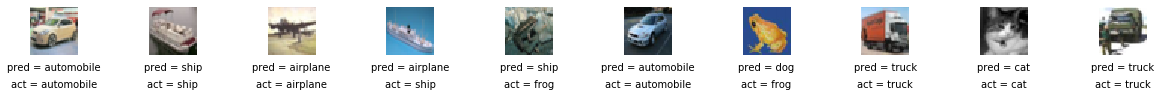

In [212]:
fig =  plt.figure(figsize = (20,6))
fig.subplots_adjust(wspace=1.5, hspace = .4)

for i, idx in enumerate(indices):
    picture = X_test[idx]
    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(pred_pic[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(real[idx]), fontsize = 10, ha= 'center', transform = ax.transAxes)
    ax.imshow(picture)

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
epochs = range(1, len(acc) + 1)

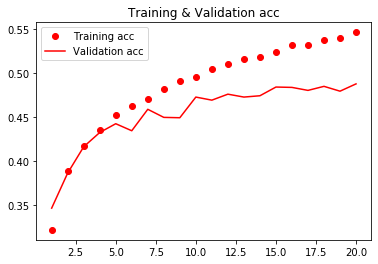

In [215]:
plt.plot(epochs, acc, 'ro', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training & Validation acc')
plt.legend()
plt.show()

#### 훈련 세트에서의 정확도는 선형으로 증가하지만 검증 세트에서는 그렇지 못하고 있다. 과대적합을 의심해 봐야 한다.

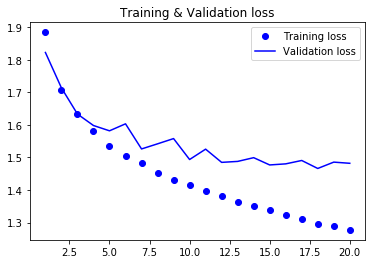

In [216]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training & Validation loss')
plt.legend()
plt.show()

#### 지금까지 간단한 DNN구조를 활용해 10개의 클래스 분류를 해보았다. 다음 번에는 CNN을 포함한 다른 방법론들을 사용해 좀 더 정확한 예측을 진행해보도록 하자.

# Finished